# Wine

## Preprocessing

In [ ]:
# Imports
import pandas as pd
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
# Import & visualize dataset
df = pd.read_csv("/Users/qxzjy/vscworkspace/dse-ft-100/ml_module/data/Wine_grading.csv")
df.head()

,Unnamed: 0,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df = df.iloc[:,1:]

In [15]:
# Print the shape of dataset in the form of (#rows, #columns)
print(f"Rows , Columuns : {df.shape}")
print()

# Describe dataset's main statistics
# We're using the include="all" attribut because we want to see/explore all values (not only numbers)
# We need to see if there's missing values (null / NaN) and the type of data we have (numerical, categorical, labels, etc.)
display(df.describe(include="all"))

# We're looking for missing values (display True or False for each column depending if values are missing or not)
display(df.isnull().any())

Rows , Columuns : (178, 14)



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Grade
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
Grade                           False
dtype: bool

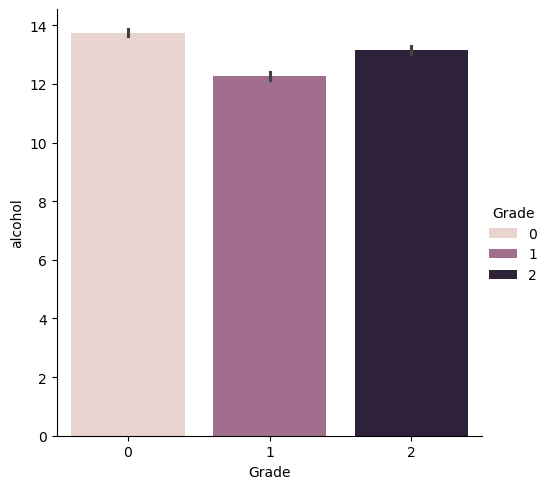

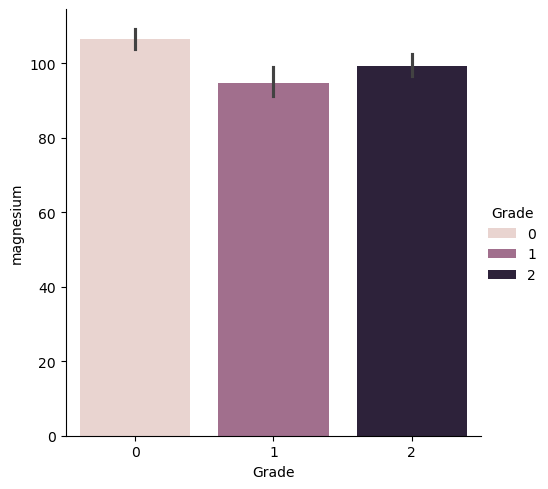

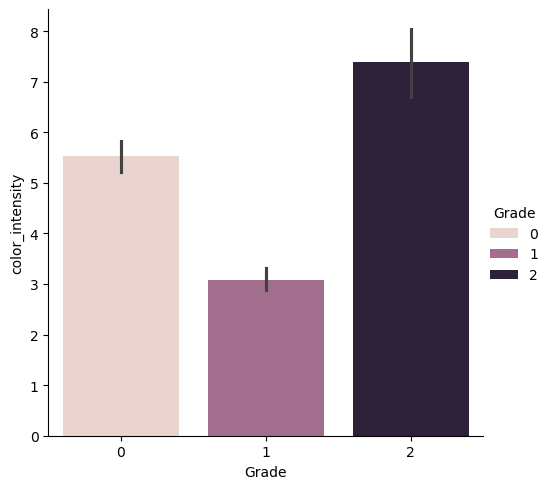

In [12]:
sns.catplot(x="Grade", y="alcohol", data=df, kind="bar", hue="Grade")
plt.show()

sns.catplot(x="Grade", y="magnesium", data=df, kind="bar", hue="Grade")
plt.show()

sns.catplot(x="Grade", y="color_intensity", data=df, kind="bar", hue="Grade")
plt.show()

In [23]:
print("Splitting dataset into X (target variable) and y (features) ...")
X = df.iloc[:,:-1]

y = df.iloc[:,-1] # We set "Purchased" as the target variable
print("...Done.")

Splitting dataset into X (target variable) and y (features) ...
...Done.


In [24]:
# Divide dataset Train set & Test set 
## First we import train_test_split


print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print("...Done.")                                                                

Splitting dataset into train set and test set...
...Done.


In [25]:
### Training pipeline ###
print("--- Training pipeline ---")
print()  

# Encoding categorical features and standardizing numeric features

print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")

# StandardScaler to scale data (i.e apply Z-score)
# numeric_features = [i  for i,item in enumerate(X_train.columns)]
# numeric_features = list(range(13))
numeric_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[  
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

--- Training pipeline ---

#### X_train BEFORE preprocessing ####
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
161    13.69        3.26  2.54               20.0      107.0           1.83   
92     12.69        1.53  2.26               20.7       80.0           1.38   
94     11.62        1.99  2.28               18.0       98.0           3.02   
174    13.40        3.91  2.48               23.0      102.0           1.80   
24     13.50        1.81  2.61               20.0       96.0           2.53   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
161        0.56                  0.50             0.80             5.88  0.96   
92         1.46                  0.58             1.62             3.05  0.96   
94         2.26                  0.17             1.35             3.25  1.16   
174        0.75                  0.43             1.41             7.30  0.70   
24         2.61                  0.28             1.66

## Build a Decision Tree

In [26]:
# Training model
print("Training model...")
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [27]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [28]:
### Test pipeline ###
print("--- Test pipeline ---") 

# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()

X_test = feature_encoder.transform(X_test)
print("...Done.")

print("#### X_test AFTER preprocessing ####")
print(X_test[0:5,:])
print()

--- Test pipeline ---
Encoding categorical features and standardizing numerical features...

...Done.
#### X_test AFTER preprocessing ####
[[ 0.93884707 -0.63216607 -0.4350103  -0.91969562  1.26324041  0.55999863
   0.97775416 -1.20637533  0.02366802  0.3392847  -0.1455748   0.85229541
   1.04940526]
 [-0.24226334  0.26757916  0.42085937  0.7127641   0.84067236 -1.27747161
  -0.60582812 -0.9706341  -0.5873972   2.42611713 -2.06608025 -1.55017035
  -0.86659858]
 [-0.76443848 -1.11802849 -0.76991583 -0.16176789 -0.92002786  2.03653722
   1.18341419 -1.36353615  0.44801887 -0.25093054  1.16386073  0.3940216
  -1.06480588]
 [ 0.71505773 -0.57818135  0.34643592  0.27549811  1.12238439  1.15061407
   0.85435814 -1.28495574  1.43251284  0.50791762  0.1163123   0.61621496
   1.24761256]
 [ 0.08098793  3.08378173 -0.881551    0.56700877 -0.99045587  0.5928106
   0.72067911 -0.49915163  0.68565534 -1.03085781 -0.97488398  0.71342456
  -1.19694407]]



In [29]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



## Evaluate model

--- Assessment of performances ---


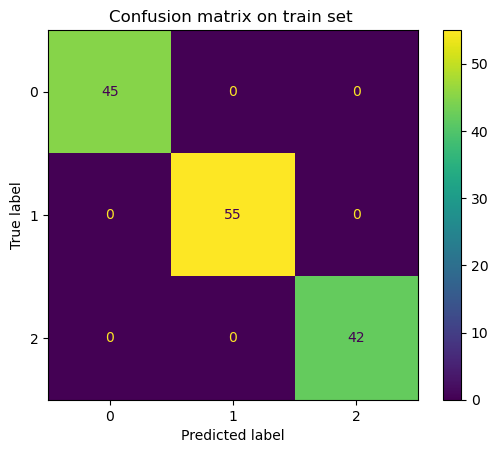

accuracy-score on train set :  1.0


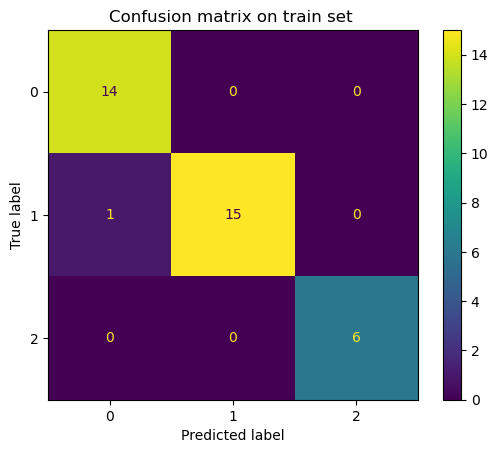

accuracy-score on test set :  0.9722222222222222


In [31]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
# cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))

# cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

In [ ]:
# Overfitting

In [40]:
# Training model
print("Training model...")
classifier_modified = DecisionTreeClassifier(min_samples_split=80, class_weight="balanced")
classifier_modified.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


Predictions on train set...
...Done.

Predictions on test set...
...Done.

--- Assessment of performances ---


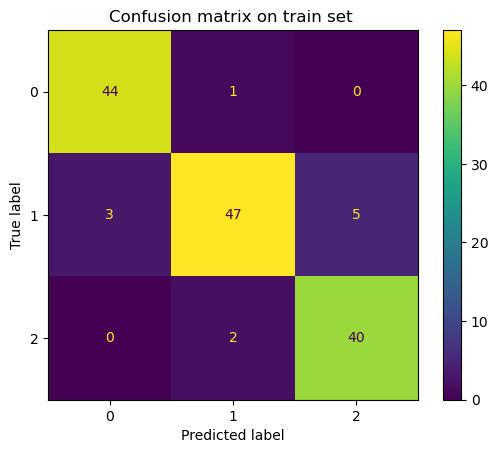

accuracy-score on train set :  0.9225352112676056


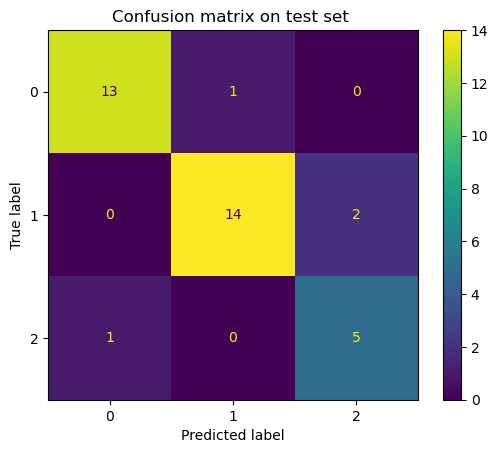

accuracy-score on test set :  0.8888888888888888


In [41]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred_modified = classifier_modified.predict(X_train)
print("...Done.")
print()

# Predictions on test set
print("Predictions on test set...")
y_test_pred_modified = classifier_modified.predict(X_test)
print("...Done.")
print()

### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
# cm = confusion_matrix(y_train, y_train_pred_modified, labels=classifier_modified.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_modified)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier_modified.score(X_train, y_train))

# cm = confusion_matrix(y_test, y_test_pred_modified, labels=classifier_modified.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_modified)
cm_display.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier_modified.score(X_test, y_test))

## Feature importance

In [42]:
# Check coefficients 

print("coefficients are: ", classifier.feature_importances_) 

# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

# Print numerical columns
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

# Append all columns 
all_column_names = numerical_column_names
print("All column names are: ",all_column_names)

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.feature_importances_
                                        
})

feature_importance

coefficients are:  [0.04073631 0.         0.         0.         0.         0.
 0.44473338 0.         0.         0.40766854 0.10686177 0.
 0.        ]
All transformers are:  [('num', StandardScaler(), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])]
One Hot Encoder transformer is:  StandardScaler()
numerical columns are:  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
All column names are:  Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


,feature_names,coefficients
0,alcohol,0.040736
1,malic_acid,0.000000
2,ash,0.000000
3,alcalinity_of_ash,0.000000
4,magnesium,0.000000
5,total_phenols,0.000000
6,flavanoids,0.444733
7,nonflavanoid_phenols,0.000000
8,proanthocyanins,0.000000
9,color_intensity,0.407669


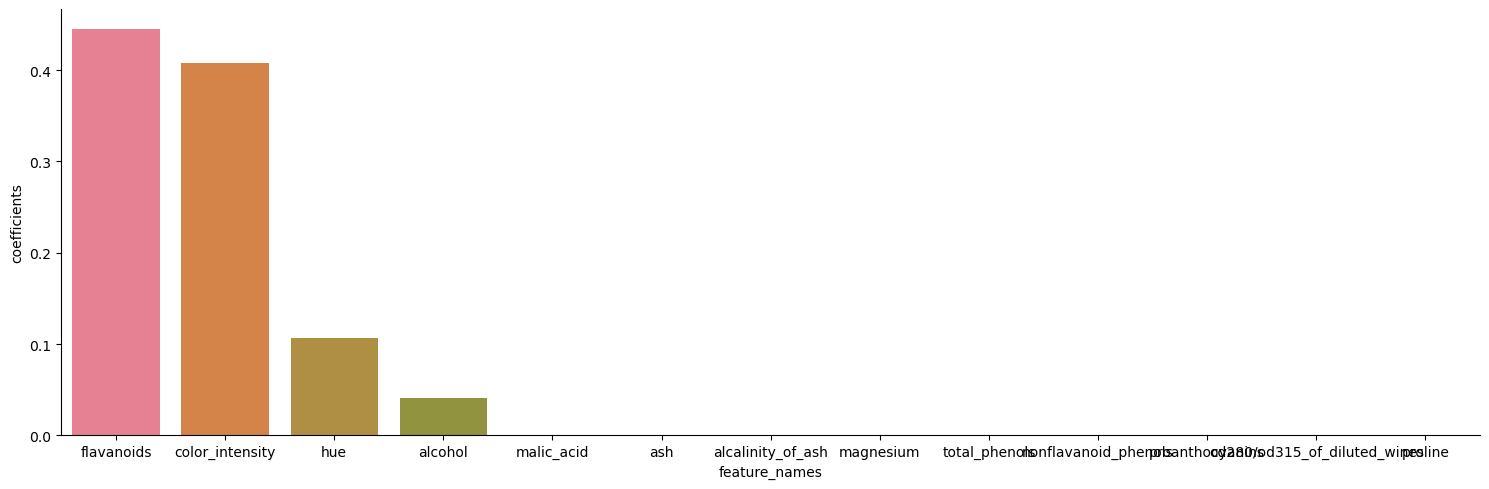

In [44]:
# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=30/10,
            hue="feature_names") # Resize graph

## Random Forest

In [ ]:
# Training model
print("Training model...")
classifier_rf = RandomForestClassifier(min_samples_split=80, class_weight="balanced" )
classifier_rf.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


Predictions on train set...
...Done.

Predictions on test set...
...Done.

--- Assessment of performances ---


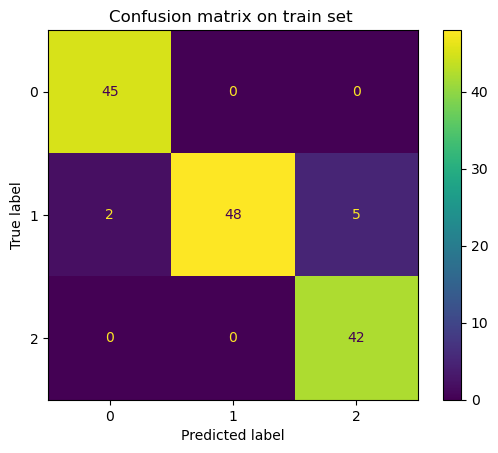

accuracy-score on train set :  0.9507042253521126


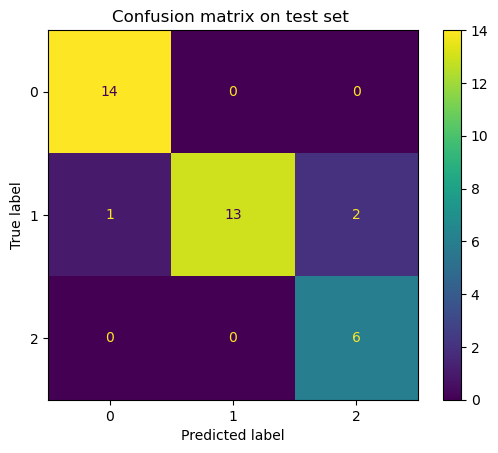

accuracy-score on test set :  0.9166666666666666


In [49]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred_rf = classifier_rf.predict(X_train)
print("...Done.")
print()

# Predictions on test set
print("Predictions on test set...")
y_test_pred_rf = classifier_rf.predict(X_test)
print("...Done.")
print()

### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
# cm = confusion_matrix(y_train, y_train_pred_rf, labels=classifier_rf.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_rf)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier_rf.score(X_train, y_train))

# cm = confusion_matrix(y_test, y_test_pred_rf, labels=classifier_rf.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_rf)
cm_display.ax_.set_title("Confusion matrix on test set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier_rf.score(X_test, y_test))

In [ ]:
# It doesn't overfit, it's close to 1, train and test are under à 5% difference => the model prediction seems to be better

# Vizualise decision tree

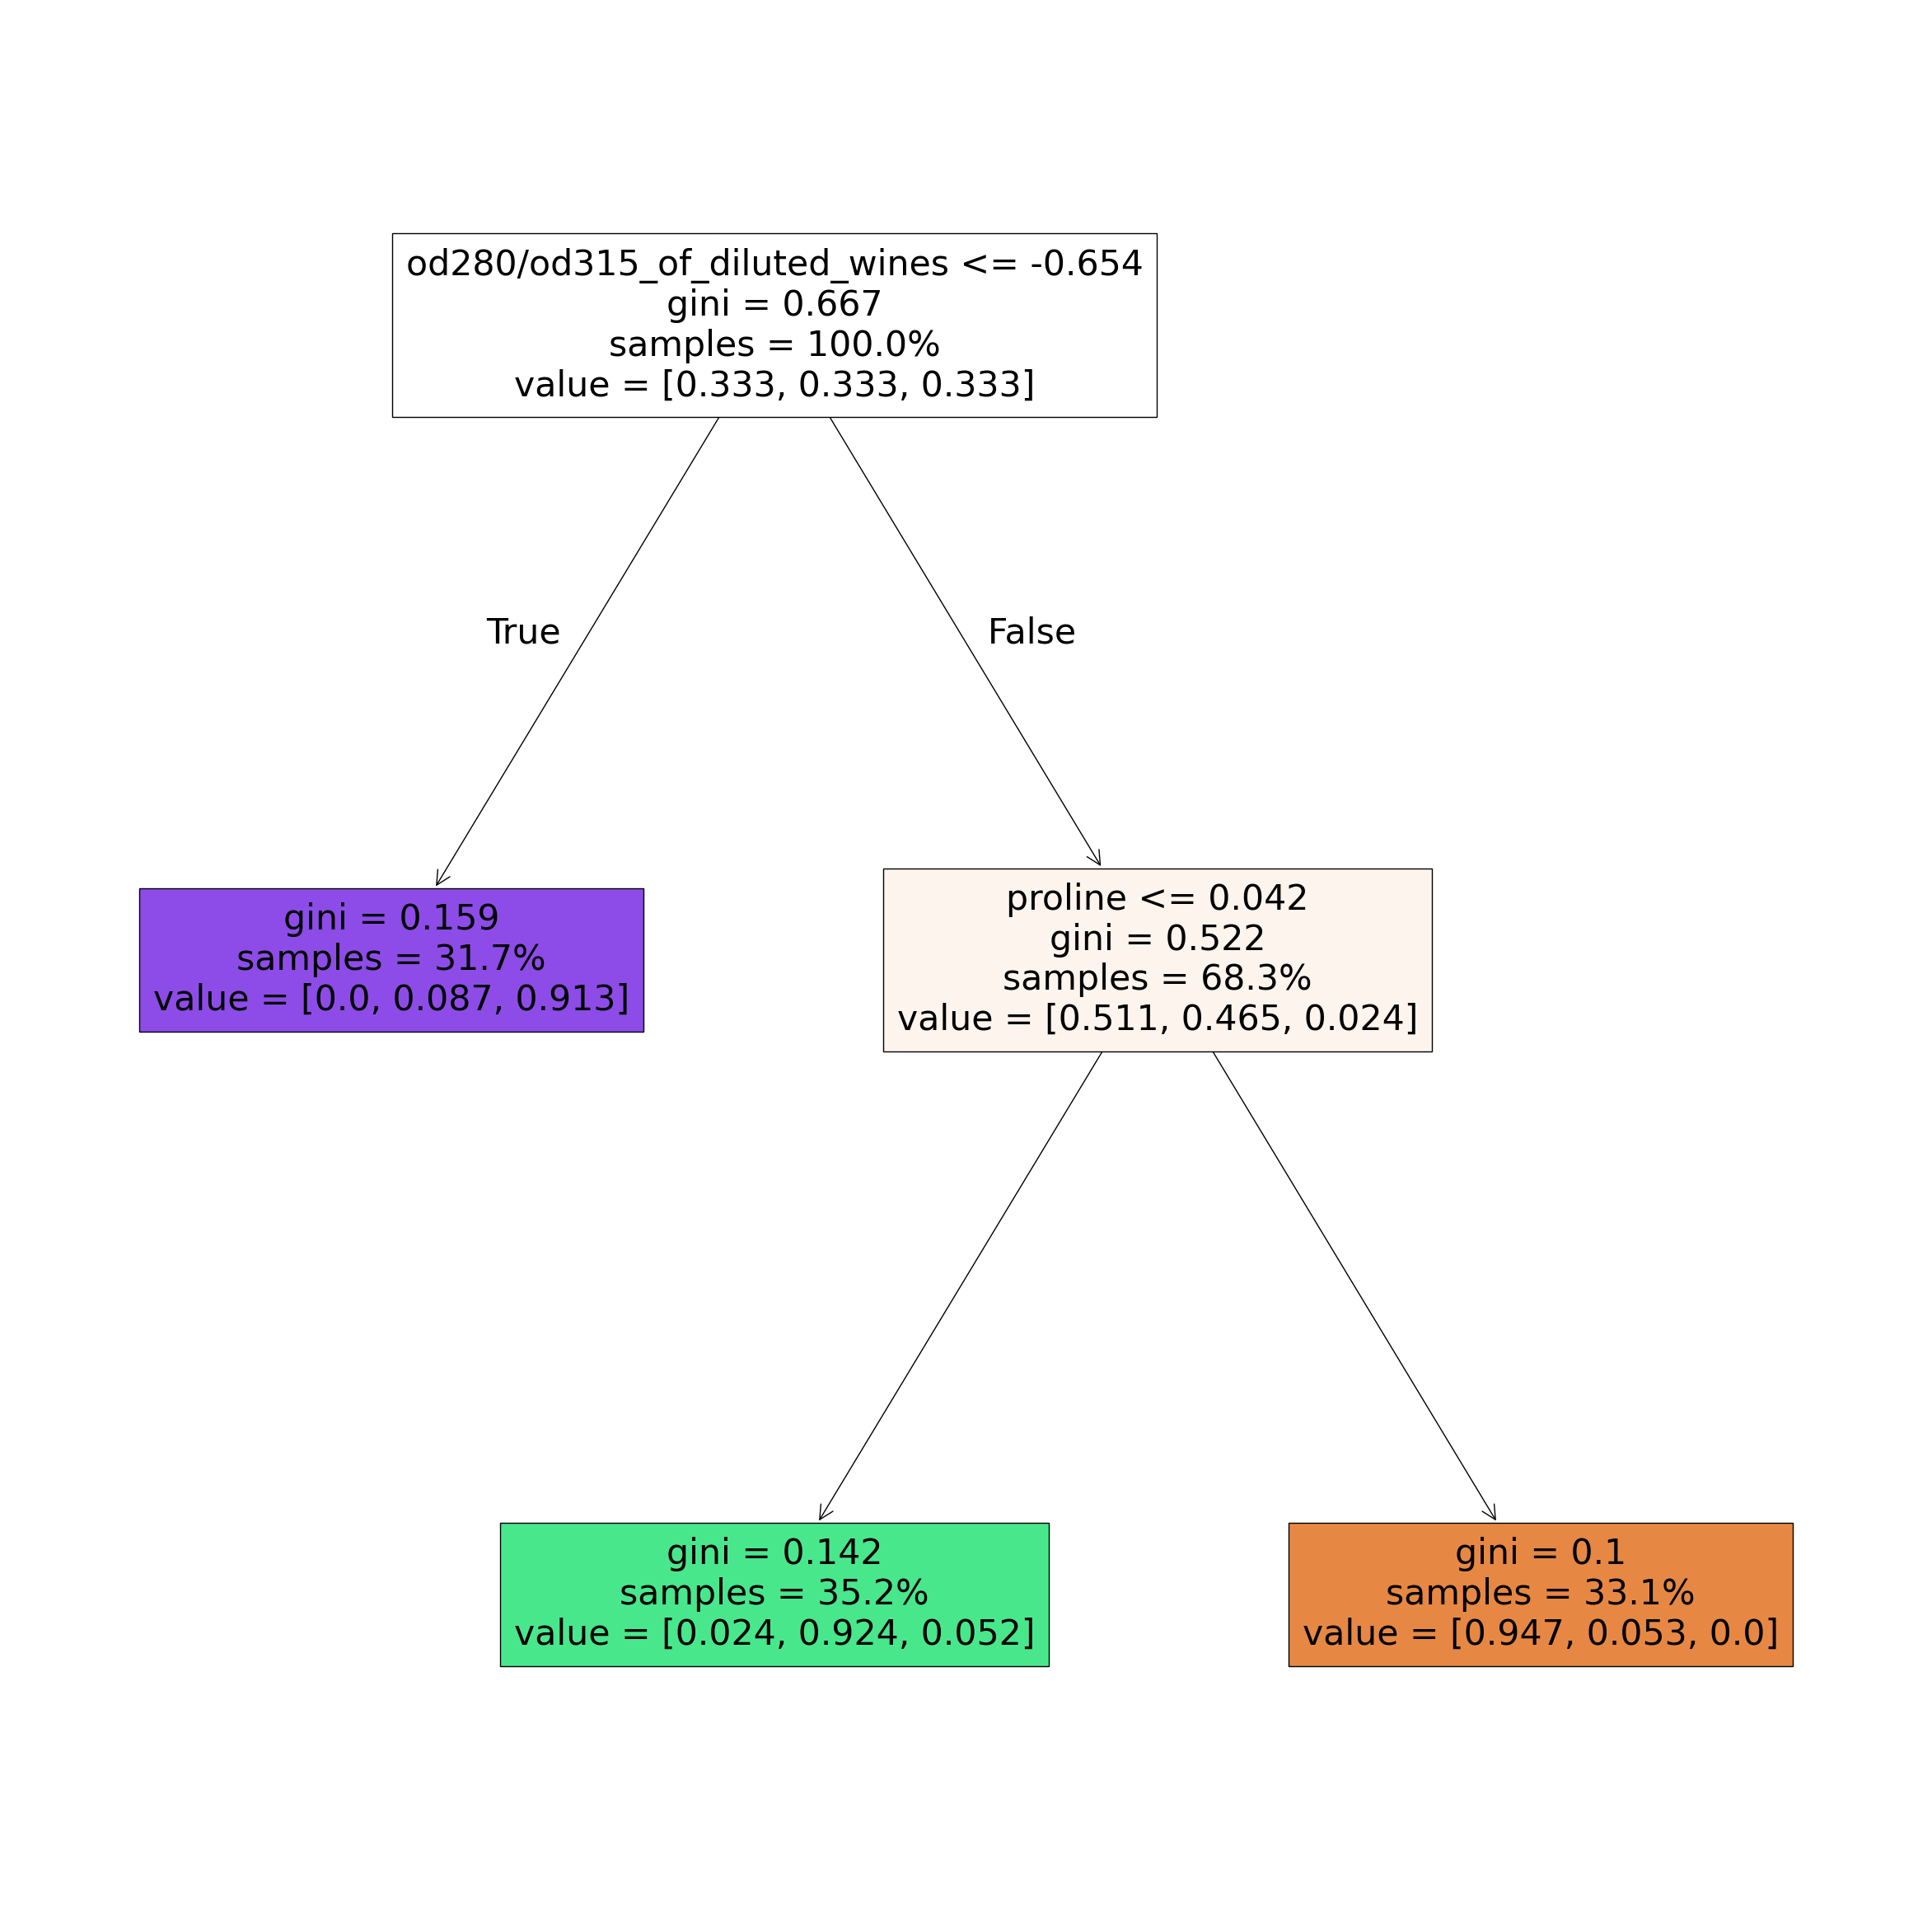

In [56]:
# plot_tree : method from sklearn which allow us to display decision trees
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(30,30)) # Resize figure
plot_tree(classifier_modified, filled=True, feature_names=all_column_names, proportion=True,ax=ax)
plt.show()